In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle

In [2]:
df = pd.read_csv('../data/sea_all_years.csv')

/Users/cf/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Drop unnamed column and NA
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)

df = df.dropna(axis=0, subset=['ArrTime', 'ArrDelay', 'DepDelay', 'DepTime', 'ActualElapsedTime', 'CRSElapsedTime', 'Distance'])

# Datetime processing
dates = df.ix[:, ['Year', 'Month', 'DayofMonth']]
dates.columns = ['year', 'month', 'day']
dates = pd.to_datetime(dates, infer_datetime_format=True)
df['Date'] = dates

In [4]:
df = df.ix[df['Origin'] == 'SEA', :]

In [5]:
df = df.ix[df['Date'] > '2008-12-01', :]

In [6]:
df.ix[(df['Date'] >= '2016-01-01') 
    & (df['Date'] < '2016-02-01') 
    & (df['UniqueCarrier'] == 'AS')
    & (df['TailNum'] == 'N559AS'), ['TailNum', 'Date', 'CRSDepTime', 'DepDelay', 'Origin', 'Dest']].sort_values(['Date', 'CRSDepTime'], ascending=True)

,TailNum,Date,CRSDepTime,DepDelay,Origin,Dest
5399747,N559AS,2016-01-01,1820.0,-5.0,SEA,KOA
5399801,N559AS,2016-01-02,910.0,8.0,SEA,ANC
5404574,N559AS,2016-01-03,1530.0,0.0,SEA,DEN
5400143,N559AS,2016-01-04,600.0,0.0,SEA,ANC
5400043,N559AS,2016-01-06,920.0,34.0,SEA,LAX
5402589,N559AS,2016-01-07,1800.0,56.0,SEA,LIH
5400920,N559AS,2016-01-08,1720.0,0.0,SEA,HNL
5400932,N559AS,2016-01-09,800.0,0.0,SEA,DCA
5408363,N559AS,2016-01-16,1030.0,-6.0,SEA,MCI
5403120,N559AS,2016-01-16,2020.0,-7.0,SEA,SJC


In [8]:
df.DepDelay.describe()

count    824705.000000
mean          5.698154
std          29.326367
min         -54.000000
25%          -4.000000
50%          -2.000000
75%           4.000000
max        1964.000000
Name: DepDelay, dtype: float64

In [7]:
def group_mean_top(df, grouping_col, quant_col, top_n):
    return df.groupby(grouping_col).mean()[quant_col].sort_values(ascending=False).head(top_n)

In [6]:
with open('../data/airport_delays.pkl', 'r') as f:
    airports = pickle.load(f)

In [143]:
# Tailnum flights / day

In [145]:
df.groupby(['TailNum', 'Date']).count()['CRSDepTime'].sort_values(ascending=False)

TailNum  Date      
N582SW   2010-08-27    6
N292SW   2011-03-16    6
N295SW   2012-07-28    5
N229SW   2011-09-05    5
N270YV   2013-03-24    5
N584SW   2010-10-13    5
N270YV   2013-03-14    5
         2013-03-13    5
         2012-10-09    5
         2012-04-09    5
N569SW   2012-08-27    5
N224SW   2012-08-19    5
         2012-08-26    5
N585SW   2012-09-11    5
         2012-08-10    5
N224SW   2012-10-30    5
N585SW   2012-08-03    5
N224SW   2010-03-14    5
N295SW   2012-09-09    5
N579SW   2012-04-22    5
N585SW   2012-09-25    5
N548CA   2014-10-26    5
N288SW   2011-03-09    5
N585SW   2012-09-28    5
N548CA   2014-09-22    5
N585SW   2012-11-06    5
N548CA   2014-08-02    5
N585SW   2012-11-07    5
N549CA   2014-09-23    5
         2014-10-21    5
                      ..
N612AS   2010-06-17    1
         2010-06-20    1
         2010-06-22    1
         2010-07-02    1
         2010-07-05    1
         2010-07-06    1
         2010-07-09    1
         2010-07-13    1
     

In [9]:
print group_mean_top(df, 'Dest', 'ArrDelay', 10)
print group_mean_top(df, 'Dest', 'DepDelay', 10)

Dest
LWS    52.000000
JAC    16.307692
HOU    13.633394
DAL    12.642968
HDN    10.654135
SFO     8.997339
BZN     6.355872
MIA     6.114806
PSC     6.100223
BLI     5.613360
Name: ArrDelay, dtype: float64
Dest
LWS    37.000000
HOU    16.847550
HDN    15.849624
JAC    14.692308
SFO    13.272928
BZN    12.822064
DAL    12.780526
MIA    10.918796
EWR    10.573339
BNA    10.052437
Name: DepDelay, dtype: float64


In [10]:
print group_mean_top(df, 'Dest', 'DepDelay', 10)

Dest
LWS    37.000000
HOU    16.847550
HDN    15.849624
JAC    14.692308
SFO    13.272928
BZN    12.822064
DAL    12.780526
MIA    10.918796
EWR    10.573339
BNA    10.052437
Name: DepDelay, dtype: float64


In [11]:
df.ix[df['Origin'] == 'CDV', :].count()

ActualElapsedTime    0
AirTime              0
ArrDelay             0
ArrTime              0
CRSArrTime           0
CRSDepTime           0
CRSElapsedTime       0
CancellationCode     0
Cancelled            0
CarrierDelay         0
DayOfWeek            0
DayofMonth           0
DepDelay             0
DepTime              0
Dest                 0
Distance             0
Diverted             0
FlightNum            0
LateAircraftDelay    0
Month                0
NASDelay             0
Origin               0
SecurityDelay        0
TailNum              0
TaxiIn               0
TaxiOut              0
UniqueCarrier        0
WeatherDelay         0
Year                 0
Date                 0
dtype: int64

In [6]:
delayed = df['DepDelay'] >= 15

In [7]:

# Function to show value counts as percentages
def value_counts_pct(series):
    counts = series.value_counts()
    indices = counts.index
    tot = sum(counts)
    for i, n in enumerate(counts):     
        print indices[i], (counts[i]) / float(tot)

In [8]:
def value_counts_pct_2nd(series):
    counts = series.value_counts()
    indices = counts.index
    tot = sum(counts)   
    return (counts[1]) / float(tot)

In [9]:
delay_ranges = range(5, 46)
y = [value_counts_pct_2nd(df['DepDelay'] >= n) for n in delay_ranges]

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-talk')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

/Users/cf/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


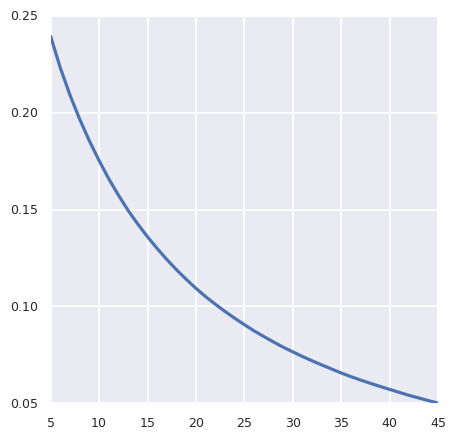

In [11]:
plt.figure(figsize=(5,5))
plt.ylabel="% of flights delayed"
plt.xlabel="Delay min cutoff"
plt.plot(delay_ranges, y)

/Users/cf/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


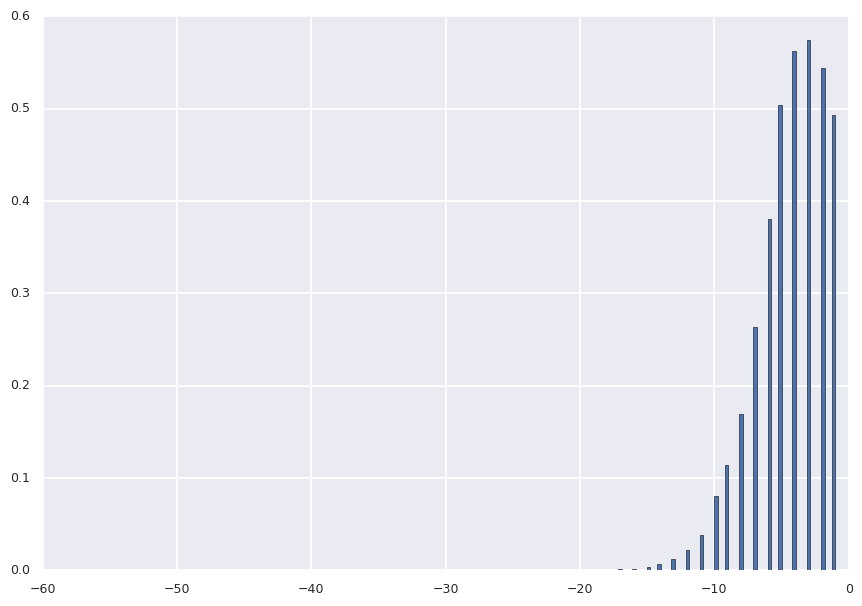

In [9]:
df.ix[df['DepDelay'] < 0, 'DepDelay'].hist(bins=200, normed=True)

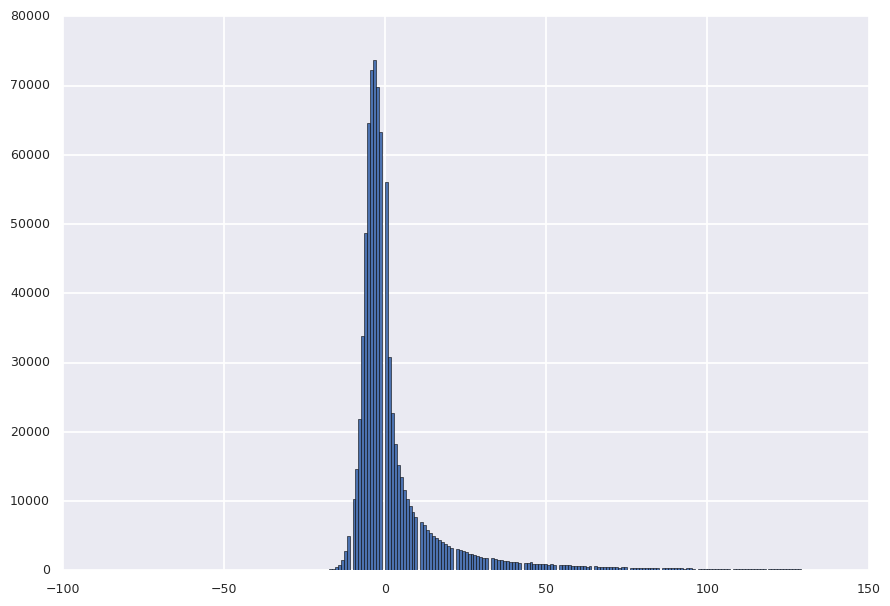

In [10]:
df.ix[df['DepDelay'] < 130, 'DepDelay'].hist(bins=200)

In [14]:
# Make business bins

In [11]:
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

In [12]:
df['CRS_Time_Rounded'] = [roundup(n) for n in df['CRSDepTime'].values]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824705 entries, 3916022 to 5578481
Data columns (total 31 columns):
ActualElapsedTime    824705 non-null float64
AirTime              824705 non-null float64
ArrDelay             824705 non-null float64
ArrTime              824705 non-null float64
CRSArrTime           824705 non-null float64
CRSDepTime           824705 non-null float64
CRSElapsedTime       824705 non-null float64
CancellationCode     0 non-null object
Cancelled            824705 non-null float64
CarrierDelay         124582 non-null float64
DayOfWeek            824705 non-null int64
DayofMonth           824705 non-null int64
DepDelay             824705 non-null float64
DepTime              824705 non-null float64
Dest                 824705 non-null object
Distance             824705 non-null float64
Diverted             824705 non-null float64
FlightNum            824705 non-null int64
LateAircraftDelay    124582 non-null float64
Month                824705 non-null int

In [14]:
df['timebin_w_date'] = df['CRS_Time_Rounded'] + df['Date']

In [15]:
business = df.groupby('timebin_w_date').count()['TailNum'].to_frame().reset_index()

In [16]:
business.columns = ['timebin_w_date', 'business_indicator']

In [17]:
df_w_business = df.merge(business, on='timebin_w_date', how='left')

In [18]:
df_w_business.groupby('business_indicator').mean()['DepDelay']

business_indicator
1     5.904166
2     6.028407
3     5.856059
4     5.858188
5     5.545927
6     5.253997
7     4.741430
8     4.078149
9     4.022114
10    5.058759
11    2.020475
12    6.179012
13    1.519231
Name: DepDelay, dtype: float64

In [19]:
lagged_periods = range(1, 13)
for l in lagged_periods:
    shifted = df_w_business.ix[:, 'business_indicator'].shift(periods=l)
    shifted.name = 'business_indicator_lagged_' + str(l)
    df_w_business = pd.concat((df_w_business, shifted), axis=1)

In [24]:
df_w_business.head(4).T

,0,1,2,3
ActualElapsedTime,153,161,240,69
AirTime,137,135,219,54
ArrDelay,-12,-3,36,-11
ArrTime,1033,1927,1851,1419
CRSArrTime,1045,1930,1815,1430
CRSDepTime,700,1545,1205,1215
CRSElapsedTime,165,165,250,75
CancellationCode,NaN,NaN,NaN,NaN
Cancelled,0,0,0,0
CarrierDelay,NaN,NaN,36,NaN


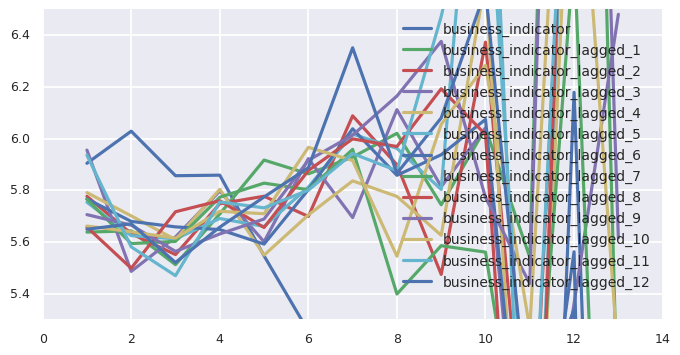

In [20]:
cols = df_w_business.columns[-13::]
fig, ax = plt.subplots(figsize=(8, 4))
for c in cols:
    ax.plot(df_w_business.groupby(c).mean()['DepDelay'], label=c)
plt.legend()
plt.ylim((5.3, 6.5))
plt.show()


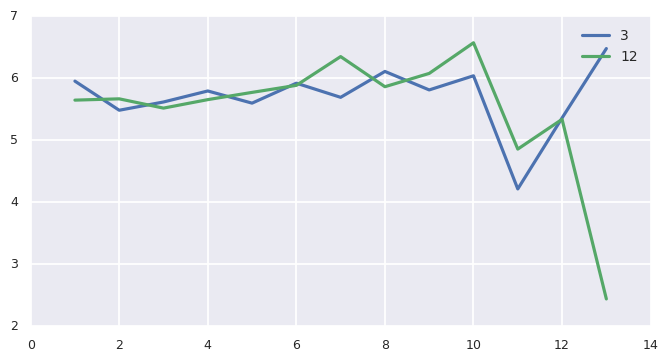

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_w_business.groupby('business_indicator_lagged_3').mean()['DepDelay'], label='3')
ax.plot(df_w_business.groupby('business_indicator_lagged_12').mean()['DepDelay'], label='12')
plt.legend()
plt.show()

In [22]:
def date_num_select(df, col, start, end):
    return df.ix[(df['Date'] > start) & (df['Date'] < end), ['Date', col]].groupby('Date').mean()[col]

In [23]:
date_num_select(df_w_business, 'DepDelay', '2013-11-01', '2013-11-30')

Date
2013-11-02     5.870536
2013-11-03     0.525735
2013-11-04     2.492806
2013-11-05     1.757576
2013-11-06     1.901818
2013-11-07     9.585714
2013-11-08     6.857143
2013-11-09     3.815900
2013-11-10     3.392593
2013-11-11     5.119134
2013-11-12     1.627820
2013-11-13     1.118519
2013-11-14     1.592857
2013-11-15     2.122744
2013-11-16     0.916667
2013-11-17     6.218045
2013-11-18     4.075812
2013-11-19     2.086466
2013-11-20     6.598540
2013-11-21     8.229927
2013-11-22    15.496454
2013-11-23     3.892562
2013-11-24     1.316602
2013-11-25     9.877323
2013-11-26     1.146520
2013-11-27     1.618375
2013-11-28     9.216749
2013-11-29     0.409483
Name: DepDelay, dtype: float64

In [24]:
df_w_business['delayed'] = df_w_business['DepDelay'] >= 15

In [33]:
summed = df_w_business.groupby('business_indicator_lagged_8').sum()['delayed']
counted = df_w_business.groupby('business_indicator_lagged_8').count()['delayed']

In [34]:
summed / counted

business_indicator_lagged_8
1.0     0.136271
2.0     0.133017
3.0     0.136265
4.0     0.136775
5.0     0.136776
6.0     0.137127
7.0     0.139931
8.0     0.133689
9.0     0.139527
10.0    0.150000
11.0    0.128583
12.0    0.172840
13.0    0.192308
Name: delayed, dtype: float64

In [35]:
df_w_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824705 entries, 0 to 824704
Data columns (total 46 columns):
ActualElapsedTime               824705 non-null float64
AirTime                         824705 non-null float64
ArrDelay                        824705 non-null float64
ArrTime                         824705 non-null float64
CRSArrTime                      824705 non-null float64
CRSDepTime                      824705 non-null float64
CRSElapsedTime                  824705 non-null float64
CancellationCode                0 non-null object
Cancelled                       824705 non-null float64
CarrierDelay                    124582 non-null float64
DayOfWeek                       824705 non-null int64
DayofMonth                      824705 non-null int64
DepDelay                        824705 non-null float64
DepTime                         824705 non-null float64
Dest                            824705 non-null object
Distance                        824705 non-null float64
Dive

In [36]:
df_no_weather = df_w_business.ix[(pd.isnull(df_w_business['WeatherDelay'])) | (df_w_business['WeatherDelay'] == 0), :]

In [37]:
df_no_weather = df_no_weather.merge(airports, how='left', left_on='Dest', right_on='Airport')

In [72]:
df_no_weather['OrDestCarrier'] = df_no_weather['Origin'] + df_no_weather['Dest'] + df_no_weather['UniqueCarrier']

In [77]:
flight_delay_history = df_no_weather.groupby('OrDestCarrier').mean()['DepDelay'].reset_index()

In [78]:
df_no_weather = df_no_weather.merge(flight_delay_history, how='left', on='OrDestCarrier', suffixes=['','r'])

In [ ]:
df_no_weather.info()

In [112]:
df_no_weather.columns.values

array(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'CancellationCode', 'Cancelled',
       'CarrierDelay', 'DayOfWeek', 'DayofMonth', 'DepDelay', 'DepTime',
       'Dest', 'Distance', 'Diverted', 'FlightNum', 'LateAircraftDelay',
       'Month', 'NASDelay', 'Origin', 'SecurityDelay', 'TailNum', 'TaxiIn',
       'TaxiOut', 'UniqueCarrier', 'Unnamed: 0.1', 'Unnamed: 0.1',
       'WeatherDelay', 'Year', 'Date', 'CRS_Time_Rounded',
       'timebin_w_date', 'business_indicator',
       'business_indicator_lagged_1', 'business_indicator_lagged_2',
       'business_indicator_lagged_3', 'business_indicator_lagged_4',
       'business_indicator_lagged_5', 'business_indicator_lagged_6',
       'business_indicator_lagged_7', 'business_indicator_lagged_8',
       'business_indicator_lagged_9', 'business_indicator_lagged_10',
       'business_indicator_lagged_11', 'business_indicator_lagged_12',
       'delayed', 'Alaska', 'Airport', '

In [45]:
df_no_weather['Alaska'] = (df_no_weather['UniqueCarrier'] == 'AS').astype(int)

In [9]:
def load_pickle(filepath):
    with open(filepath, 'r') as f:
        return pickle.load(f)

In [39]:
df_no_weather = df_no_weather.dropna(subset=['business_indicator_lagged_12', 'Airport'])

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split

/Users/cf/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
y = df_no_weather.ix[:, 'delayed'].values

In [80]:
X = df_no_weather.ix[: ,['AirTime',
       'DayOfWeek', 'DayofMonth', 'CRSDepTime',
       'Distance', 
       'Month',  
       'Year', 'Alaska',
       'AvgArrDelay', 'DepDelayr'
        ]]

In [67]:
dataframe_for_model = df_no_weather.ix[: ,['AirTime',
       'DayOfWeek', 'DayofMonth', 'CRSDepTime',
       'Distance', 
       'Month',  
        'Dest',
       'Year', 'Alaska',
       'AvgArrDelay',
        'delayed',
        'DepDelay',
        'UniqueCarrier',
        'Date'
        ]].sample(n=1000)

In [64]:
np.unique(dataframe_for_model.UniqueCarrier.values)

array(['AA', 'AS', 'B6', 'CO', 'DL', 'F9', 'FL', 'HA', 'NK', 'NW', 'OO',
       'UA', 'US', 'VX', 'WN'], dtype=object)

In [65]:
import cPickle as pickle

In [68]:
with open('../data/modeldata.pkl', 'w') as f:
    pickle.dump(dataframe_for_model, f)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [82]:
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=2, verbose=1).fit(X_train, y_train)
clf.score(X_test, y_test) 

      Iter       Train Loss   Remaining Time 
         1           0.7739            1.29m
         2           0.7685            1.25m
         3           0.7643            1.24m
         4           0.7605            1.23m
         5           0.7578            1.21m
         6           0.7550            1.21m
         7           0.7531            1.20m
         8           0.7511            1.19m
         9           0.7495            1.18m
        10           0.7482            1.17m
        20           0.7405            1.06m
        30           0.7366            1.01m
        40           0.7343           55.91s
        50           0.7325           51.10s
        60           0.7314           45.47s
        70           0.7305           40.22s
        80           0.7297           35.13s
        90           0.7291           30.26s
       100           0.7284           25.24s


0.86705777107453907

In [83]:
with open('../src/model.pkl', 'w') as f:
    pickle.dump(clf, f)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [85]:
y_score = clf.predict_proba(X_test)

In [86]:
y_predicted = clf.predict(X_test)

In [87]:
def key_metrics(y_tru, y_pre):
    print "Accuracy: ", accuracy_score(y_tru, y_pre)
    print "Recall: ", recall_score(y_tru, y_pre)
    print "Precision: ", precision_score(y_tru, y_pre)

In [88]:
key_metrics(y_test, y_predicted)

Accuracy:  0.867057771075
Recall:  0.00313749444691
Precision:  0.653179190751


In [89]:
for e, f in zip(X.columns, clf.feature_importances_):
    print e, f

AirTime 0.0642699155688
DayOfWeek 0.0379173199653
DayofMonth 0.141874007945
CRSDepTime 0.173535636379
Distance 0.0513421721199
Month 0.201788128171
Year 0.1124887273
Alaska 0.00168114957645
AvgArrDelay 0.0200706090602
DepDelayr 0.195032333915


0.75795880149812733

In [90]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.metrics import confusion_matrix

Convenience plot with ``partial_dependence_plots``


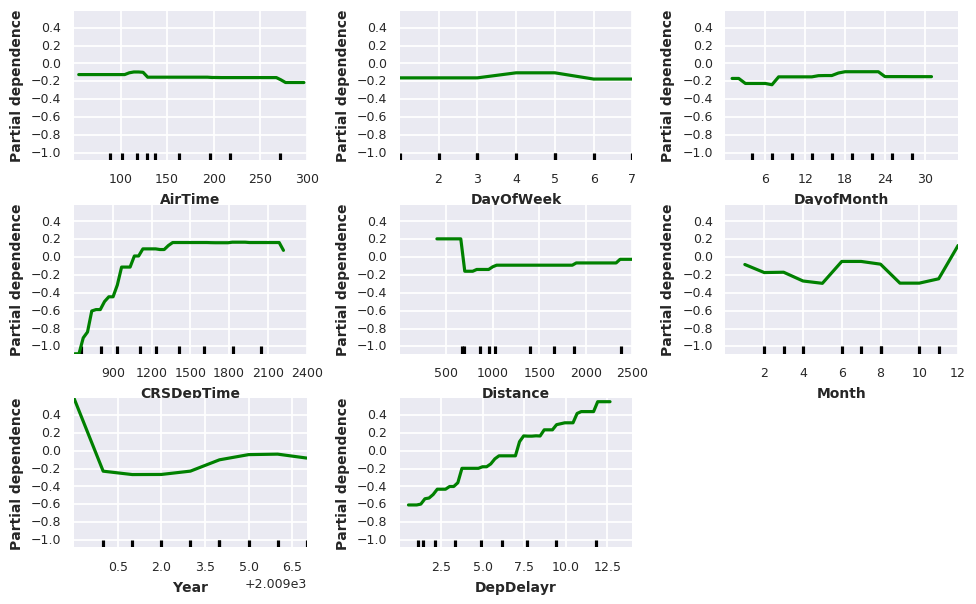

In [109]:
print('Convenience plot with ``partial_dependence_plots``')

features = [0, 1, 2, 3, 4, 5, 6, 9]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=X.columns,
                                   n_jobs=3, grid_resolution=50)
fig.suptitle('')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

In [94]:
confusion_matrix(y_test, y_pred_custom_thresh)

NameError: name 'y_pred_custom_thresh' is not defined

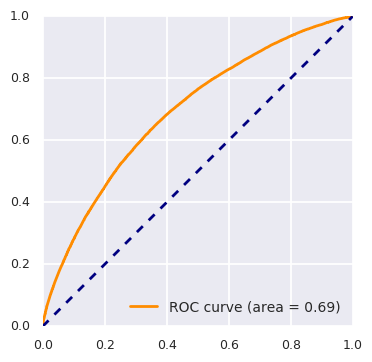

In [95]:
plt.figure(figsize=(4,4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

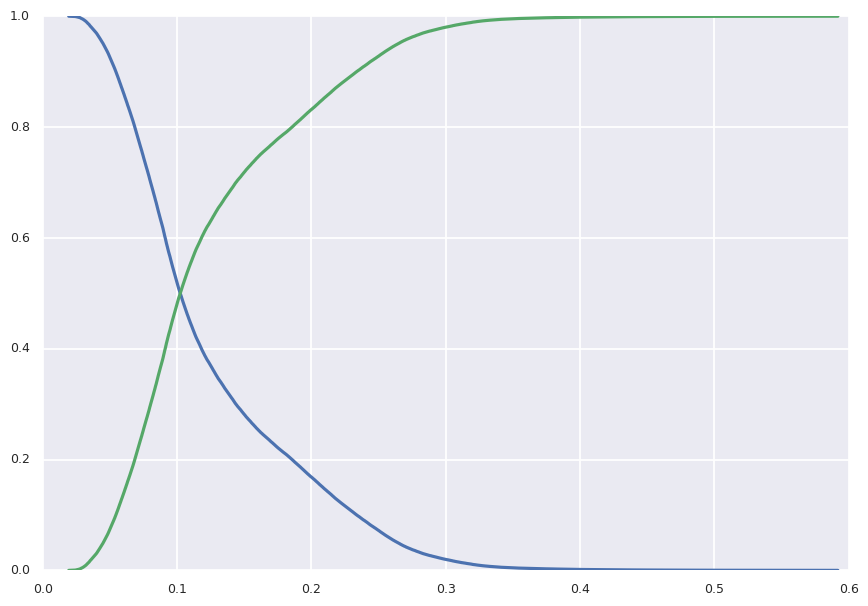

In [96]:
plt.plot(thresholds, fpr)
plt.plot(thresholds, 1 - fpr)

In [70]:
for i, j in zip(fpr, thresholds):
    print i, j

0.0 0.998737114736
0.0 0.986569430239
4.25685886384e-06 0.98619962905
4.25685886384e-06 0.928580031642
8.51371772769e-06 0.928512573026
8.51371772769e-06 0.924983386916
1.27705765915e-05 0.924933173618
1.27705765915e-05 0.918244220359
1.70274354554e-05 0.918167730025
1.70274354554e-05 0.917076601473
2.12842943192e-05 0.917010063175
2.12842943192e-05 0.915895795997
2.55411531831e-05 0.915777996444
2.55411531831e-05 0.908327828525
2.97980120469e-05 0.908241420352
2.97980120469e-05 0.903992863654
3.40548709108e-05 0.903983415057
3.40548709108e-05 0.9015155499
3.83117297746e-05 0.901504636355
3.83117297746e-05 0.898979625508
4.25685886384e-05 0.898833609965
4.25685886384e-05 0.898359866654
4.68254475023e-05 0.898343963865
4.68254475023e-05 0.897779504954
5.10823063661e-05 0.897755691346
5.10823063661e-05 0.89423003701
5.533916523e-05 0.89408190016
5.533916523e-05 0.891158186298
5.95960240938e-05 0.891155259235
5.95960240938e-05 0.890172520151
6.38528829577e-05 0.889784555802
6.38528829577e

In [102]:
y_pred_custom_thresh = [1 if n >= .14 else 0 for n in clf.predict_proba(X_test)[:, 1]]

In [103]:
key_metrics(y_test, y_pred_custom_thresh)

Accuracy:  0.674388945571
Recall:  0.595651932474
Precision:  0.225885251598


In [106]:
# Compare thresholds
thresh_list = np.linspace(.01, .30, 100)

In [107]:
accuracies = []
recalls = []
precisions = []
for t in thresh_list:
    y_p = [1 if n >= t else 0 for n in clf.predict_proba(X_test)[:, 1]]
    accuracies.append(accuracy_score(y_test, y_p))
    recalls.append(recall_score(y_test, y_p))
    precisions.append(precision_score(y_test, y_p))

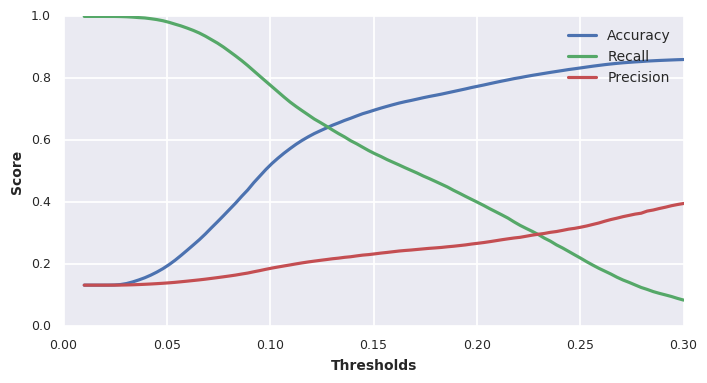

In [108]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(thresh_list, accuracies, label='Accuracy')
ax.plot(thresh_list, recalls, label='Recall')
ax.plot(thresh_list, precisions, label='Precision')
plt.legend()
ax.set_xlabel('Thresholds')
ax.set_ylabel('Score')
plt.show()

In [41]:
y_regressor = df_no_weather.ix[:, 'DepDelay'].values

In [45]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regressor, test_size=0.33)

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.3, 
                                max_depth=3, loss='ls', verbose=1).fit(X_train_r, y_train_r)
mean_squared_error(y_test_r, est.predict(X_test_r))  

      Iter       Train Loss   Remaining Time 
         1         760.0917            2.59m
         2         739.4869            2.57m
         3         724.7133            2.53m
         4         712.6348            2.51m
         5         704.1754            2.45m
         6         698.8271            2.49m
         7         696.3216            2.47m
         8         692.5970            2.44m
         9         690.1170            2.43m
        10         687.3304            2.38m
        20         666.3160            2.10m
        30         653.6943            1.83m
        40         646.1660            1.56m
        50         639.8445            1.30m
        60         634.8493            1.04m
        70         630.3603           46.90s
        80         626.1833           31.19s
        90         621.6831           15.62s
       100         619.3840            0.00s


697.33751252104059

In [53]:
y_pred_reg_aligned = [1 if n >= 15 else 0 for n in est.predict(X_test)]
y_pred_reg_raw = est.predict(X_test)

In [54]:
predictions = pd.DataFrame(
    {'y_raw': y_pred_reg_raw,
     'y_reg_pred': y_pred_reg_aligned,
#      'y_cls_pred': y_pred_custom_thresh,
     'y_actual': y_test.astype(int)
    })

In [55]:
predictions.head(50)

,y_actual,y_raw,y_reg_pred
0,0,4.306449,0
1,0,3.786918,0
2,0,0.409688,0
3,0,3.973783,0
4,0,-1.690333,0
5,0,7.637363,0
6,0,3.645439,0
7,0,-0.440769,0
8,0,15.885797,1
9,0,-1.916104,0


In [56]:
key_metrics(y_pred_reg_aligned, y_test)

Accuracy:  0.86154726947
Recall:  0.451300236407
Precision:  0.213081817167


In [164]:
predictions.describe()

,y_actual,y_cls_pred,y_raw,y_reg_pred
count,270735.000000,270735.00000,270735.000000,270735.000000
mean,0.132306,0.37690,5.404815,0.083680
std,0.338824,0.48461,14.033829,0.276907
min,0.000000,0.00000,-49.158843,0.000000
25%,0.000000,0.00000,-0.317404,0.000000
50%,0.000000,0.00000,2.861147,0.000000
75%,0.000000,1.00000,7.981526,0.000000
max,1.000000,1.00000,951.183592,1.000000


In [167]:
df_no_weather.DepDelay.describe()

count    820407.000000
mean          5.411340
std          28.629221
min         -54.000000
25%          -5.000000
50%          -2.000000
75%           4.000000
max        1964.000000
Name: DepDelay, dtype: float64

In [168]:
# Cap delays at 100

In [169]:
delays_capped = df_no_weather.DepDelay

In [183]:
delays_capped = pd.Series(np.array([100 if n >= 100 else n for n in delays_capped]), name='delays_capped')

In [185]:
df_capped = pd.concat([df_no_weather, delays_capped], axis=1)

In [186]:
df_capped.describe().T

,count,mean,std,min,25%,50%,75%,max
ActualElapsedTime,820407.0,183.077248,74.297081,30.0,NaN,NaN,NaN,480.0
AirTime,820407.0,160.639620,72.477989,17.0,NaN,NaN,NaN,437.0
ArrDelay,820407.0,1.245373,30.821327,-83.0,NaN,NaN,NaN,1971.0
ArrTime,820407.0,1492.470359,535.276665,1.0,NaN,NaN,NaN,2400.0
CRSArrTime,820407.0,1510.411122,520.948989,1.0,NaN,NaN,NaN,2359.0
CRSDepTime,820407.0,1302.515889,516.379098,1.0,NaN,NaN,NaN,2359.0
CRSElapsedTime,820407.0,187.243215,74.690616,38.0,NaN,NaN,NaN,416.0
Cancelled,820407.0,0.000000,0.000000,0.0,NaN,NaN,NaN,0.0
CarrierDelay,120294.0,17.821030,48.683873,0.0,NaN,NaN,NaN,1964.0
DayOfWeek,820407.0,3.964395,1.995495,1.0,NaN,NaN,NaN,7.0


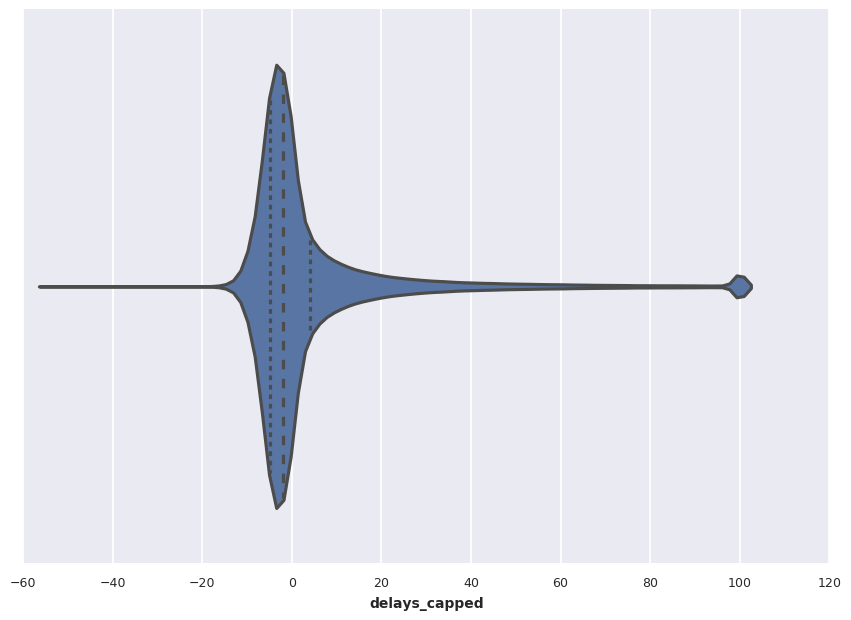

In [213]:
plt.figure()
sns.violinplot(df_capped.delays_capped, inner="quartile")
plt.show()

In [218]:
justdelays = df_capped.dropna(subset=['DepDelay'])

In [220]:
np.percentile(justdelays.DepDelay, [.25, .50, .75])

array([-13., -12., -12.])

In [225]:
justdelays.DepDelay.describe()

count    820407.000000
mean          5.411340
std          28.629221
min         -54.000000
25%          -5.000000
50%          -2.000000
75%           4.000000
max        1964.000000
Name: DepDelay, dtype: float64

In [234]:
justdelays.DepDelay.quantile(.95)

43.0

In [243]:
df_no_weather['delay_bins'] = pd.cut(df_no_weather.DepDelay, bins=[-60, 0, 15, 45, 2000], labels=[0, 1, 2, 3])

In [245]:
y_mc = df_no_weather.ix[:, 'delay_bins']

In [246]:
X_mc = df_no_weather.ix[: ,['AirTime', 'ArrTime',
       'DayOfWeek', 'DayofMonth', 'DepTime',
       'Distance', 
       'Month',  
       'Year', 'Alaska',
       'business_indicator',
       'business_indicator_lagged_1', 'business_indicator_lagged_2',
       'business_indicator_lagged_3', 'business_indicator_lagged_4',
       'business_indicator_lagged_5', 'business_indicator_lagged_6',
       'business_indicator_lagged_7', 'business_indicator_lagged_8',
       'business_indicator_lagged_9', 'business_indicator_lagged_10',
       'business_indicator_lagged_11', 'business_indicator_lagged_12']]

In [247]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y_mc, test_size=0.33)

In [249]:
mclsgb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.3, max_depth=3, random_state=4, verbose=1).fit(X_train_mc, y_train_mc)
mclsgb.score(X_test_mc, y_test_mc) 

      Iter       Train Loss   Remaining Time 
         1      575530.8021           18.68m
         2      539519.0813           18.12m
         3      519949.1512           17.79m
         4      508742.3617           17.57m
         5      501797.2720           17.43m
         6      496898.1075           17.27m
         7      493546.3150           17.06m
         8      491152.8822           16.93m
         9      489221.0193           16.89m
        10      487733.9427           16.88m
        20      478167.8059           16.00m
        30      473403.0554           14.87m
        40      470496.6872           13.88m
        50      467037.8093           13.30m
        60      464143.7576           12.68m
        70      461584.8883           11.89m
        80      459590.3478           10.97m
        90      457631.9988            9.95m
       100      455724.1436            8.96m
       200      442201.9681            0.00s


0.67926939627310834

In [250]:
multiclass_predictions = mclsgb.predict(X_test_mc)

In [252]:
multiclass_predictions

array([0, 0, 0, ..., 1, 0, 0])

In [253]:
mcpredictions = pd.DataFrame(
    {'pred': multiclass_predictions,
     'actual': y_test_mc
    })

In [257]:
mc_delay_class = [1 if n >= 2 else 0 for n in multiclass_predictions]

In [258]:
mc_dep_delay_class = [1 if n >= 2 else 0 for n in y_test_mc]

In [259]:
recall_score(mc_dep_delay_class, mc_delay_class)

0.11134337891589002

In [260]:
precision_score(mc_dep_delay_class, mc_delay_class)

0.79088471849865949